In [11]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy.misc import imread


In [12]:
%matplotlib inline
sns.set_context("poster")

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


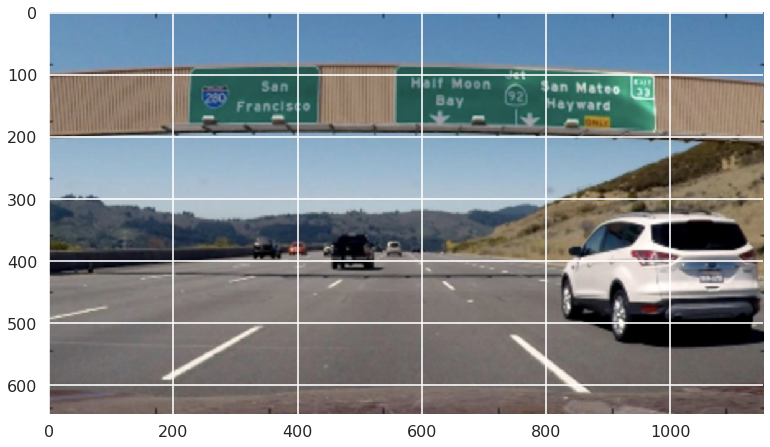

In [13]:
img = imread("signs_vehicles_xygrad.png")
plt.imshow(img)

In [14]:
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255, sobel_kernel=3):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
      
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    binary_output = np.zeros_like(scaled_sobel)
    
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return binary_output

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


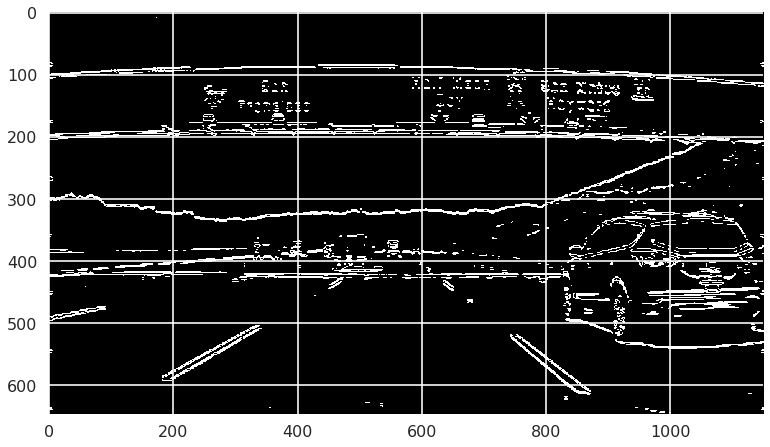

In [15]:
tmp = abs_sobel_thresh(img, 'y', 40,100)
plt.imshow(tmp, cmap="gray")

In [16]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3) Calculate the magnitude
    gradmag = np.sqrt(sobel_x ** 2 + sobel_y ** 2)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_gradmag = np.uint8(255 * gradmag / np.max(gradmag))
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scaled_gradmag)
    # 6) Return this mask as your binary_output image
    binary_output[(scaled_gradmag >= mag_thresh[0]) & (scaled_gradmag <= mag_thresh[1])] = 1
    return binary_output

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


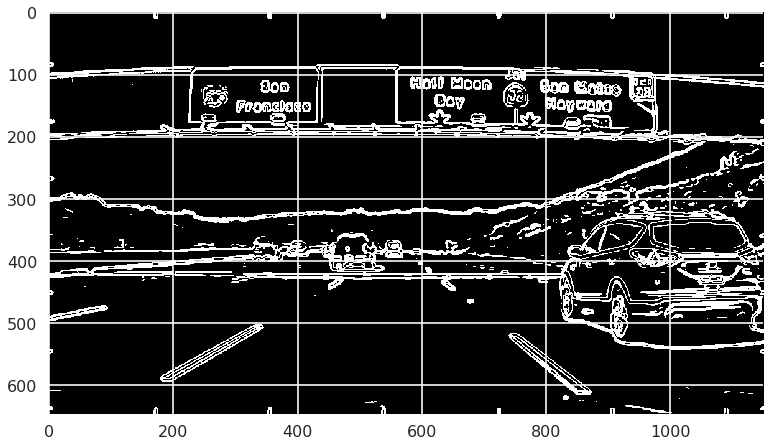

In [17]:
tmp = mag_thresh(img, 9, (30,100))
plt.imshow(tmp, cmap="gray")

In [18]:
# Define a function to threshold an image for a given range and Sobel kernel
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


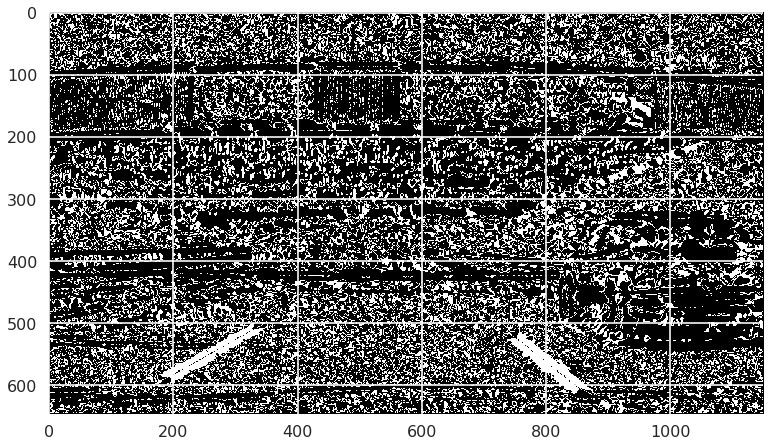

In [19]:
tmp = dir_threshold(img, 15, (.7,1.2))
plt.imshow(tmp, cmap="gray")

In [43]:
def color_threshold(img, h_thresh=(15, 100), s_thresh=(90, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    S = hls[:,:,2]
    
    binary = np.zeros_like(S)
    binary[((S >= s_thresh[0]) & 
           (S <= s_thresh[1]))] = 1
    return binary


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


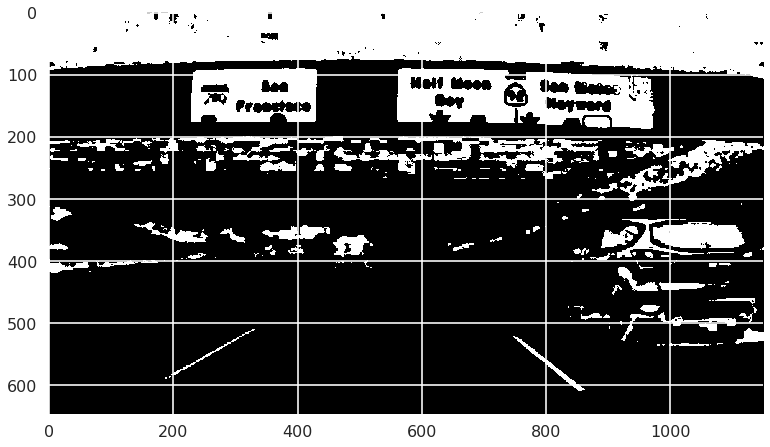

In [44]:
tmp=color_threshold(img)
plt.imshow(tmp, cmap="gray")

In [45]:
def hsv_threshold(img, v_thresh=(0,30)):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    S = hsv[:,:,2]
    
    binary = np.zeros_like(S)
    binary[((S >= v_thresh[0]) & (S <= v_thresh[1]))] = 1
    return binary

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


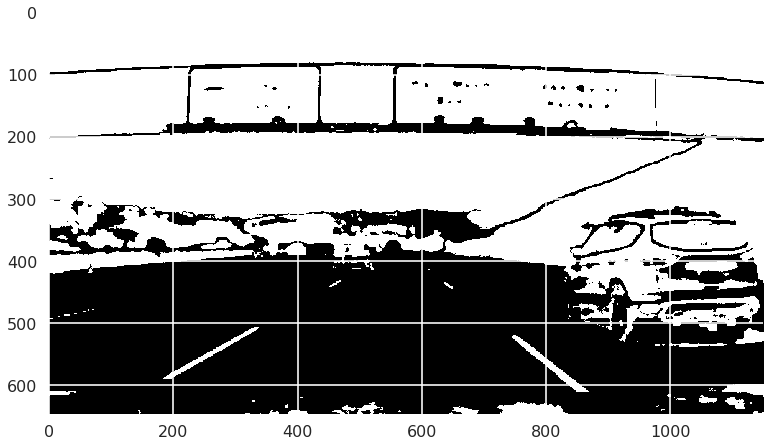

In [46]:
tmp = hsv_threshold(img, (0,30))
plt.imshow(tmp)

In [ ]:
def find_lane_line(img):
    x_threshold = abs_sobel_thresh(img, 'x', 30, 120, 31)
    y_threshold = abs_sobel_thresh(img, 'y', 60, 180, 31)
    d_threshold = dir_threshold(img, 11, (.7,1.2))
    c_threshold = color_threshold(img)
    v_threshold = hsv_threshold(img)
    
    binary = np.zeros_like(x_threshold)
    binary[((x_threshold == 1) | (y_threshold == 1)) & (d_threshold == 1) & (v_threshold == 1)] = 1
    return binary

In [115]:
t_width

173

In [116]:
l_width = 825 - 200
t_width = 637 - 464
midpoint_x = 200 + l_width/2

In [124]:
midpoint_x - t_width/2

426.0

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


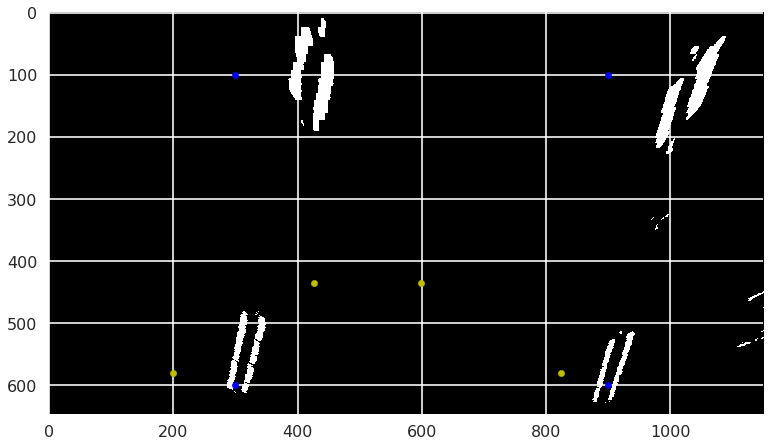

In [127]:
tmp = find_lane_line(img)
source_points = np.array([[426,435],[599,435],[200,580],[825,580]], dtype=np.float32)
dest_points = np.array([[300,100],[900,100],[300,600],[900,600]], dtype=np.float32)
plt.scatter(x=[x[0] for x in source_points], y=[x[1] for x in source_points], c='y', s=40)
plt.scatter(x=[x[0] for x in dest_points], y=[x[1] for x in dest_points], c='b', s=40)
M = cv2.getPerspectiveTransform(source_points, dest_points)
img_size = (tmp.shape[1], tmp.shape[0])
warped = cv2.warpPerspective(tmp, M, img_size, flags=cv2.INTER_LINEAR )
plt.imshow(warped, cmap="gray")